In [53]:
import pandas as pd

data = pd.read_csv('C:\\Users\\USER\\Downloads\\vehicle-dataset-from-cardekho\\car data.csv')
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [54]:
data['Car_Name'].nunique()
data['Car_Name'].value_counts()

city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
TVS Sport                    1
TVS Wego                     1
ignis                        1
Bajaj Avenger 150 street     1
Name: Car_Name, Length: 98, dtype: int64

In [55]:
#Checking for missing values
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [56]:
#dataset statistics
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [57]:
#Heuristics information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


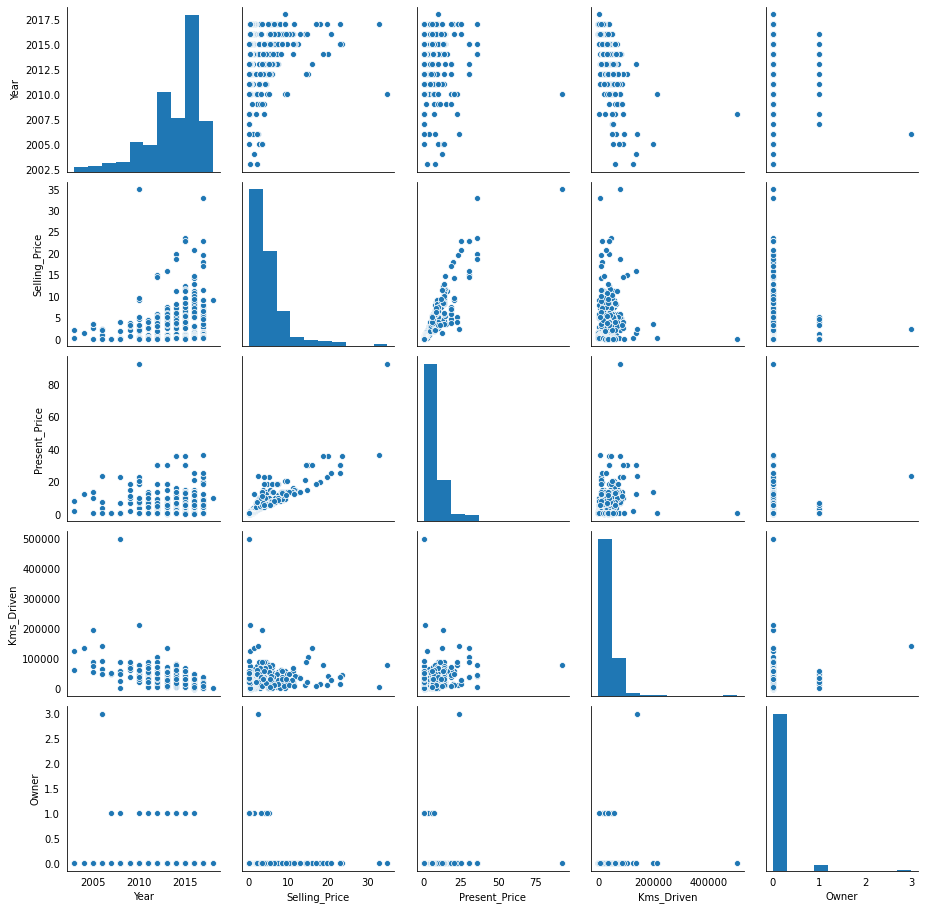

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style({ 
    'axes.spines.bottom': False,
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'xtick.bottom': False,
    'ytick.left': False
})

sns.pairplot(data)

In [59]:
# Theories:
#     - Latest Cars have the higher selling price
#     - Cars with less milage(Kms driven) have higher selling price

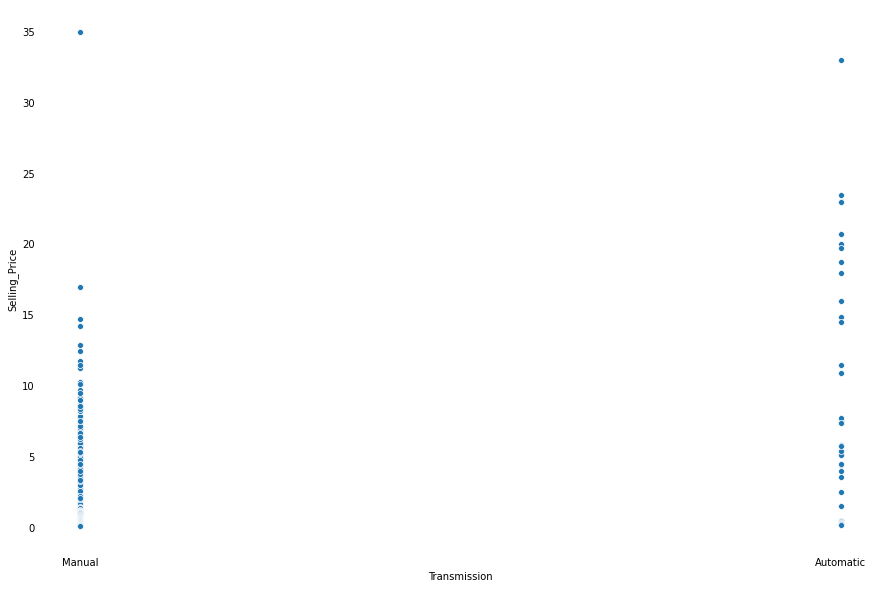

In [60]:
fig,ax1 = plt.subplots(figsize=(15,10))
sns.scatterplot(x='Transmission',y='Selling_Price',data=data,ax=ax1)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000263AA400A90>],
      dtype=object)

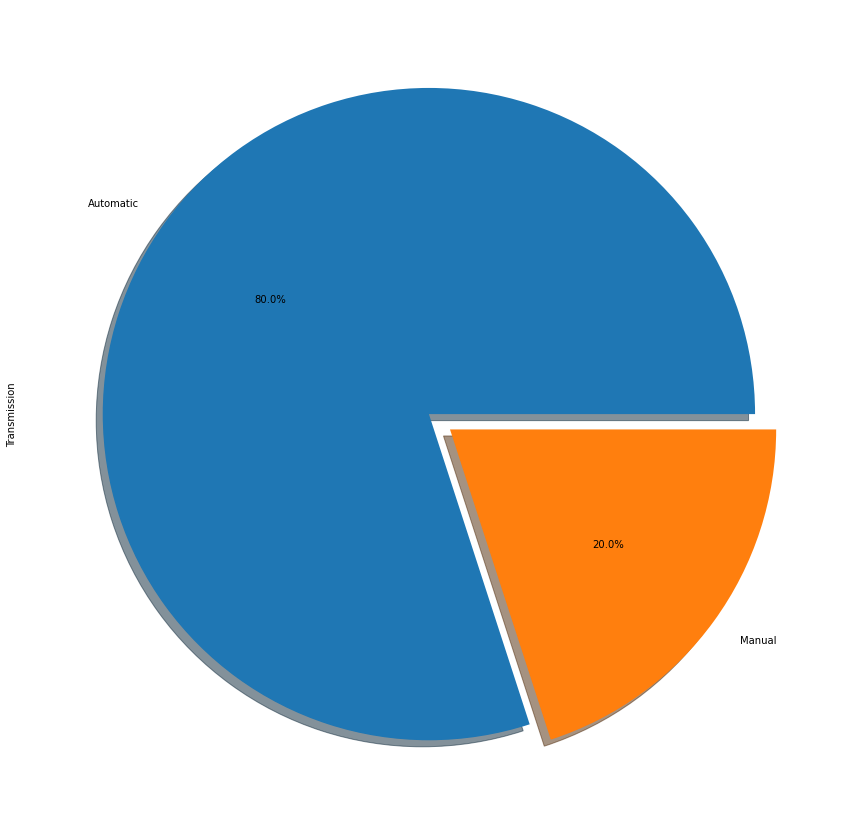

In [61]:
# Cars with Automatic Transmission have higher selling prices

data.loc[:,['Transmission','Selling_Price']].sort_values(by=['Selling_Price'],ascending =False)['Transmission'].head(15).value_counts().plot.pie(figsize=(15,15),subplots=True, autopct='%.1f%%',explode=[0,.08],shadow=True)

In [62]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df = pd.get_dummies(data['Fuel_Type'],prefix='FT',drop_first=True)
data['Seller_Type'] = le.fit_transform(data['Seller_Type'])
data['Transmission'] = le.fit_transform(data['Transmission'])
data = pd.concat([data,df],axis=1)
data.drop(['Fuel_Type'],axis=1,inplace=True)
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Seller_Type,Transmission,Owner,FT_Diesel,FT_Petrol
0,ritz,2014,3.35,5.59,27000,0,1,0,0,1
1,sx4,2013,4.75,9.54,43000,0,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,0,1,0,0,1
3,wagon r,2011,2.85,4.15,5200,0,1,0,0,1
4,swift,2014,4.60,6.87,42450,0,1,0,1,0


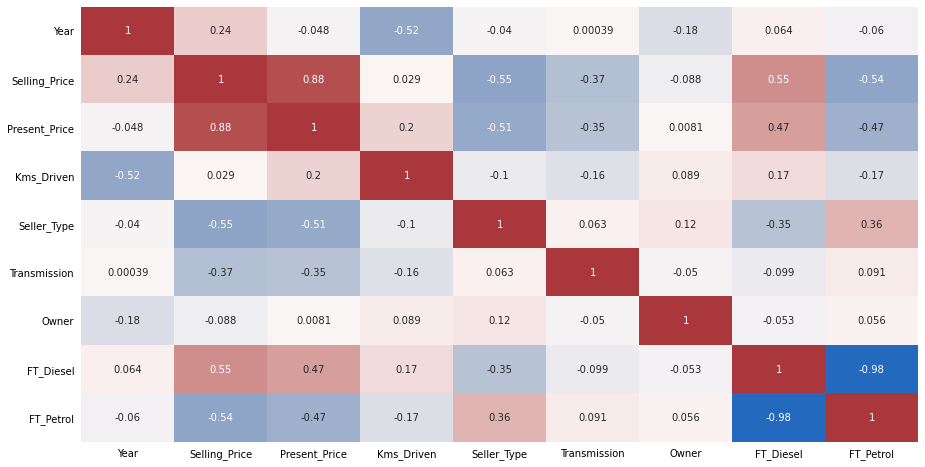

In [63]:
#Getting Correlation between the Features
fig,ax1 = plt.subplots(figsize=(15,8))
sns.heatmap(data.corr(),annot=True,ax=ax1,cmap=sns.cm.vlag,cbar=False)

In [64]:
# Deductions from the Heap Map:
#     - Selling price has a strong correlation with Year,Present Price and Fuel Type
# A model will be created with only strong correlated features

In [86]:
def model(X,y):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)
    lr = LinearRegression()
    
    lr.fit(X_train,y_train)
    y_pred = lr.predict(X_test)
    
    coeffecients = pd.DataFrame(lr.coef_,X.columns)
    coeffecients.columns = ['Coeffecient']
    print(f' Coefficients : \n {coeffecients} \n')
    
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    print(f'Mean Squared Error of Test Set : {mse}')
    print(f'Root Mean Square Error of Test Set : {rmse}')
    
    yt_pred = lr.predict(X_train)
    tmse = mean_squared_error(y_test,y_pred)
    trmse = np.sqrt(mse)
    print(f'Mean Squared Error of Train Set : {tmse}')
    print(f'Root Mean Square Error of Train Set : {trmse}')

In [87]:
#train test_split
X = data.drop(['Car_Name','Selling_Price','Kms_Driven','Seller_Type','Transmission',
               'Owner','FT_Petrol'],axis = 1)
y = data['Selling_Price']

In [88]:
model(X,y)

 Coefficients : 
                Coeffecient
Year              0.477448
Present_Price     0.464558
FT_Diesel         1.880541 

Mean Squared Error of Test Set : 3.754064376967317
Root Mean Square Error of Test Set : 1.9375408065295856
Mean Squared Error of Train Set : 3.754064376967317
Root Mean Square Error of Train Set : 1.9375408065295856
